In [1]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Part 1 ‐ Exploratory data analysis
The attached logins.json file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [2]:
# Load data
logins = pd.read_json('logins.json')
logins.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
# Build 15-minute counts dataframe and replace nan values with zero
logins.set_index('login_time', inplace=True)
logins['Counts'] = 1
logins = (1*logins.resample('15T').sum()).fillna(0)
logins.head(10)

,Counts
login_time,
1970-01-01 20:00:00,2.0
1970-01-01 20:15:00,6.0
1970-01-01 20:30:00,9.0
1970-01-01 20:45:00,7.0
1970-01-01 21:00:00,1.0
1970-01-01 21:15:00,4.0
1970-01-01 21:30:00,0.0
1970-01-01 21:45:00,4.0
1970-01-01 22:00:00,9.0


In [4]:
# Observe the last date of this dataset
logins.tail()

,Counts
login_time,
1970-04-13 17:45:00,5.0
1970-04-13 18:00:00,5.0
1970-04-13 18:15:00,2.0
1970-04-13 18:30:00,7.0
1970-04-13 18:45:00,6.0


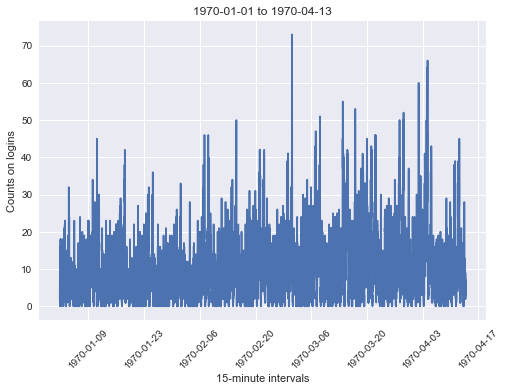

In [5]:
# Visualize the 15-minute interval counts for the whole date range
plt.plot(logins)
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970-01-01 to 1970-04-13')

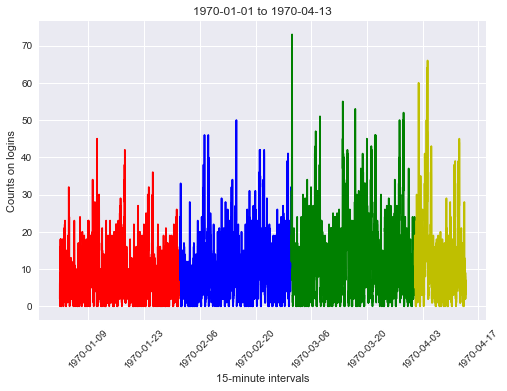

In [6]:
# Visualize the 15-minute interval counts for the whole date range 
# and color different months in different colors
plt.title('1970-01-01 to 1970-04-13')
plt.plot(logins['1970-01-01': '1970-01-31'], 'r')
plt.plot(logins['1970-02-01': '1970-02-28'], 'b')
plt.plot(logins['1970-03-01': '1970-03-31'], 'g')
plt.plot(logins['1970-04-01': '1970-04-13'], 'y')
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')

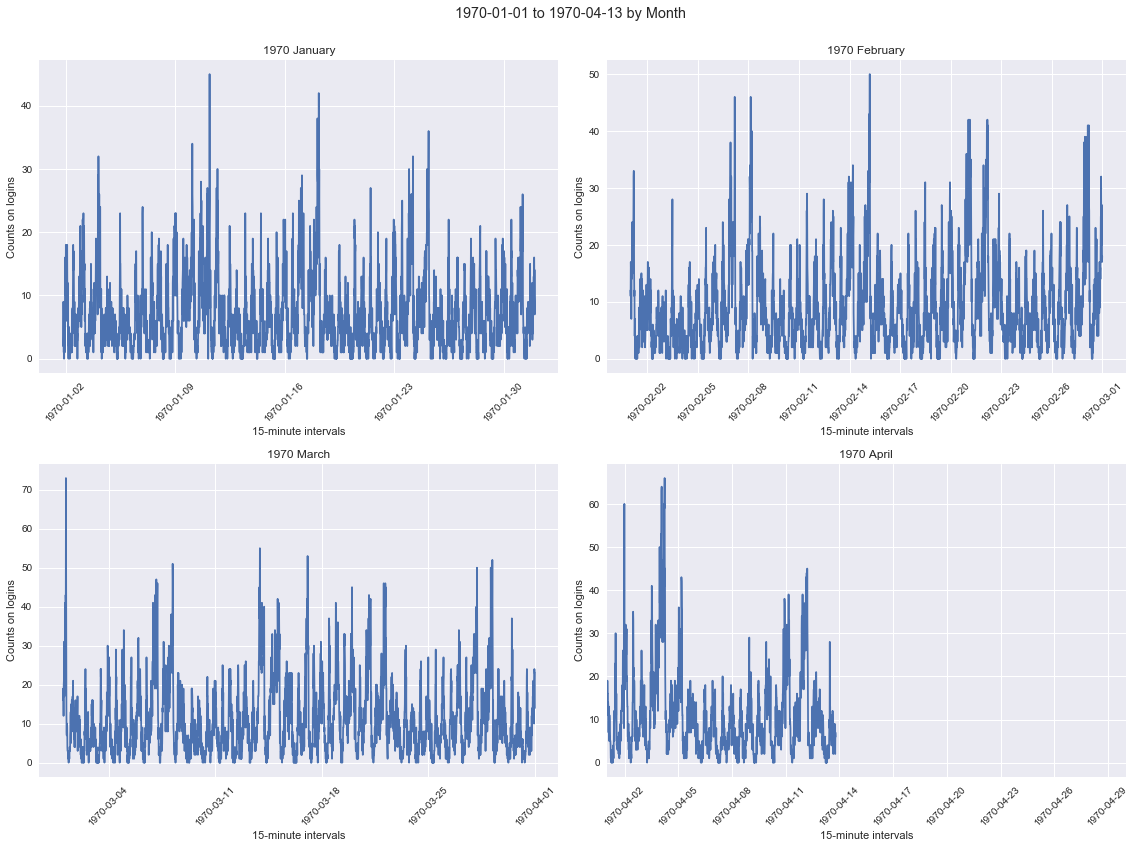

In [7]:
# # Visualize the 15-minute interval counts for each month
fig, ax = plt.subplots(nrows=2, ncols=2)
fig.set_size_inches(16, 12)
plt.suptitle('1970-01-01 to 1970-04-13 by Month')

plt.subplot(2, 2, 1)
plt.plot(logins['1970-01-01': '1970-01-31'])
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 January')

plt.subplot(2, 2, 2)
plt.plot(logins['1970-02-01': '1970-02-28'])
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 February')

plt.subplot(2, 2, 3)
plt.plot(logins['1970-03-01': '1970-03-31'])
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.title('1970 March')

plt.subplot(2, 2, 4)
plt.plot(logins['1970-04-01': '1970-04-13'])
plt.xticks(rotation=45)
plt.xlabel('15-minute intervals')
plt.ylabel('Counts on logins')
plt.xlim('1970-04-01', '1970-04-30')
plt.title('1970 April')

plt.tight_layout(rect=[0, 0, 1, 0.95])

In [8]:
logins['weekday'] = logins.index.weekday

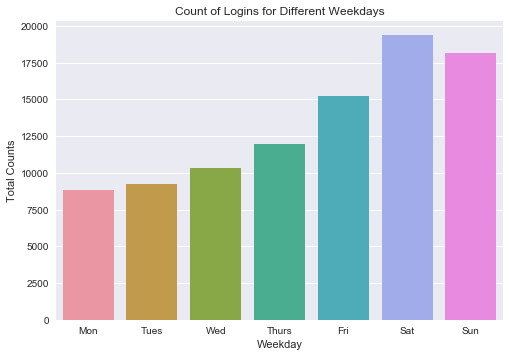

In [9]:
# Visualize the total counts for different weekdays
wkday_count = logins.groupby('weekday').sum()
wkday_count.index = ['Mon', 'Tues', 'Wed','Thurs','Fri', 'Sat', 'Sun']
sns.barplot(x='index', y='Counts', data=wkday_count.reset_index())
plt.ylabel('Total Counts')
plt.xlabel('Weekday')
plt.title('Count of Logins for Different Weekdays')

In [12]:
logins['hour'] = logins.index.hour

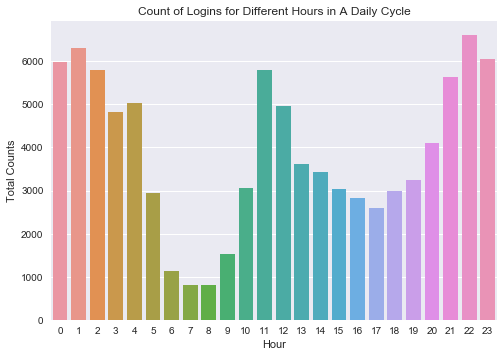

In [21]:
# Visualize the total counts for different daily hours
hour_count = logins.drop('weekday', axis=1).groupby('hour').sum()
sns.barplot(x='hour', y='Counts', data=hour_count.reset_index())
plt.ylabel('Total Counts')
plt.xlabel('Hour')
plt.title('Count of Logins for Different Hours in A Daily Cycle')

The first three plots above visualize the login counts in 15-minute interval in the range of 1970-1-1 to 1970-04-13 and in each month. From the first three plots, it can be seen that the login counts in 15-minute interval fluctuates a lot but there seems to be a pattern in this fluctuation and that login counts of a month tend to be higher and higher comparing with the counts last month. 

Then the last two plots above visualize total counts for different weekdays and hours in the range of 1970-1-1 to 1970-04-13. From the different weekdays plot, it is shown that login counts are higher in weekends and from Monday to Friday the counts are higher than the former day. From the different hours plot, it is shown that early morning between 6 am and 9 am have much less login counts, then there is a peak during lunch hours, and the highest peak comes at night between 9 pm and 2 am. 

## Part 2 ‐ Experiment and metrics design
The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on: 
    * how you will implement the experiment 
    * what statistical test(s) you will conduct to verify the significance of theobservation 
    * how you would interpret the results and provide recommendations to the city operations team along with any caveats.

### Solution: 
1. The key measure of success I would choose in this experiment is number of times driver partners cross the bridge in a week because if reimbursing all toll costs does encourage driver partners to be available in both cities, then the times that driver parters cross the bridge should increase, which also indicates that more drivers are available in both cities. I choose this metric because it is intuitive for understanding and easy to apply statistical tests. <br/><br/>

2. I would randomly record a group of more than 30 driver partners' number of times crossed the bridge before and after the action of reimbursing toll costs happens. 
   <br/><br/>I would then use a 1-sample z statistic test to verify the significance of the observation with null hypothesis being there is no difference in the number of times driver partners crossing the bridge before and after the action of toll cost reimbursement.I would calculate the z-score and then use a 95% confidence interval to determine whether or not the null hypothesis should be rejected. 
  <br/><br/>If te null hypothesis is rejected, then it indicates that there could be a difference before and after the action and I would recommend that the company continue to reimburse toll costs and continue observing the number of times drivers are crossing the bridge. If it is not rejected, then the city operation teams might need to come up with other solutions that could encourage driver partners to be available in both cities. 